# Exploratory Data Analysis on Telco's Customer Churn & Retention 
In this notebook we will explore Telco's customer data further by asking more questions about retained and churned customers, as well as arriving to insights and conclusions for each question.

# Load the cleaned dataset 
Before starting any exploratory analysis, we will load the previous notebook in which Telco's data was wrangled and cleaned for ease of use.

In this dataset, the following customer information was provided and defined by the telecom provider:

+ __Demographic info about customers:__ gender, age range, and if they have partners and dependents
+ __Services purchased:__ phone, multiple lines, Internet, online security, online backup, device protection, tech support, and streaming TV and movies
+ __Customer account information:__ how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
+ __Churn:__ customers who left within the last month
+ __Tenure:__ number of consecutive months customers were or continue to be on contract

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

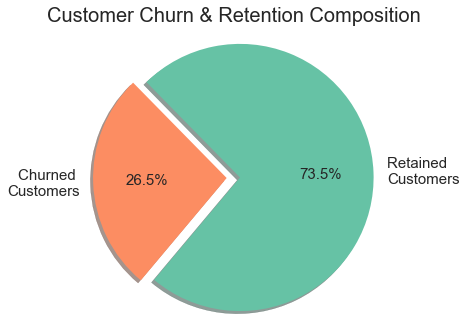

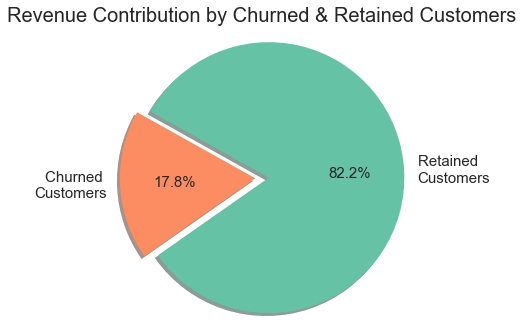

avg churned customer total charge = 1531.8
avg retained customer total charge = 2555.34


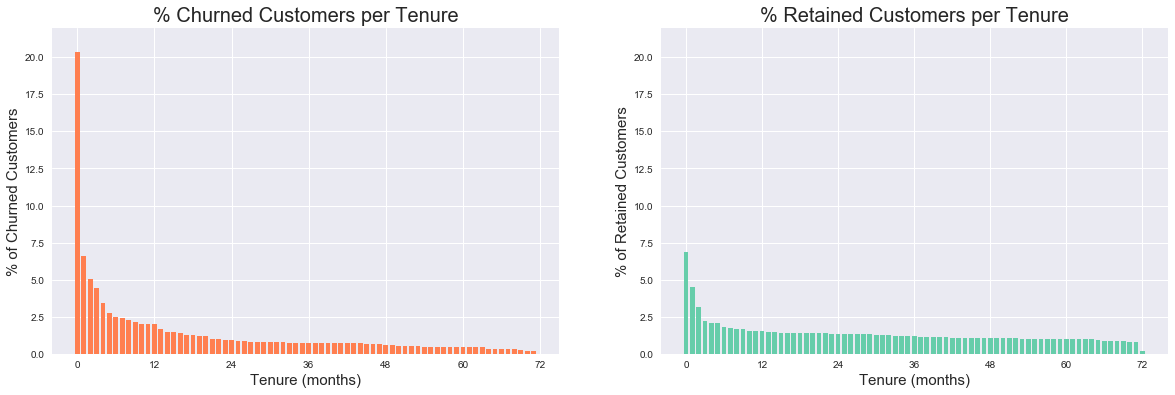

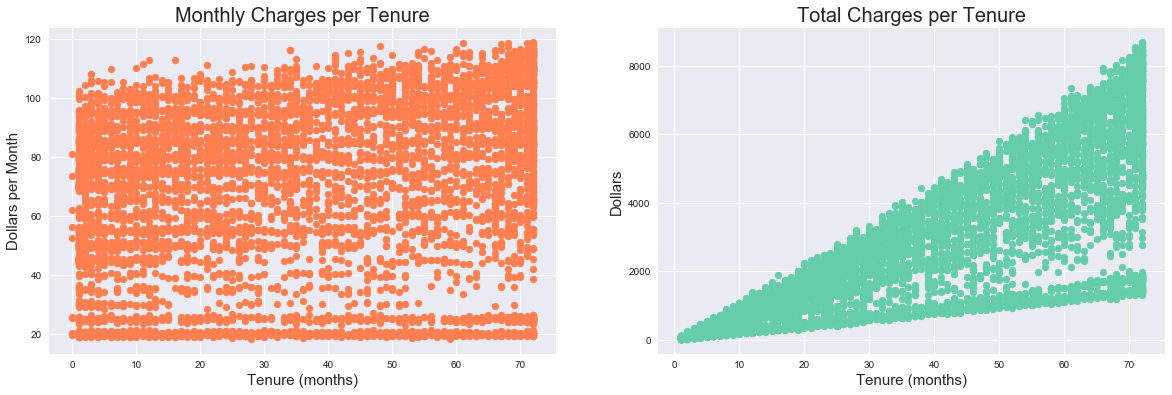

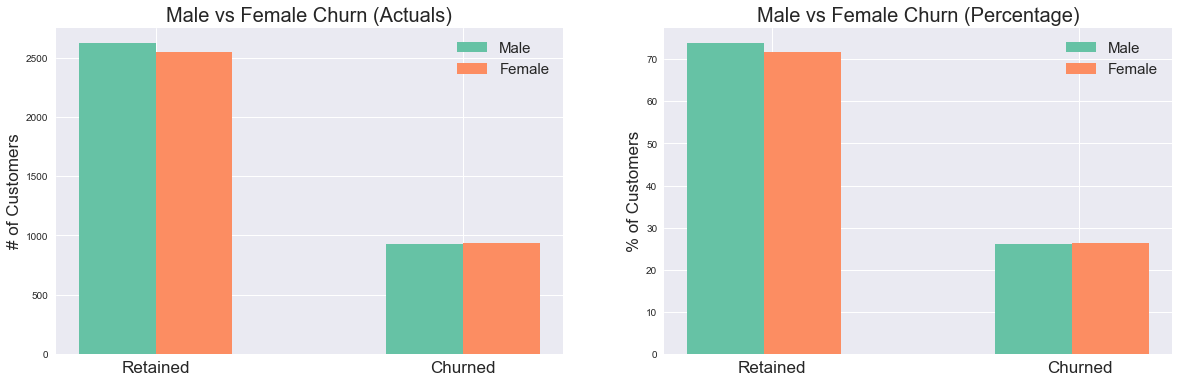

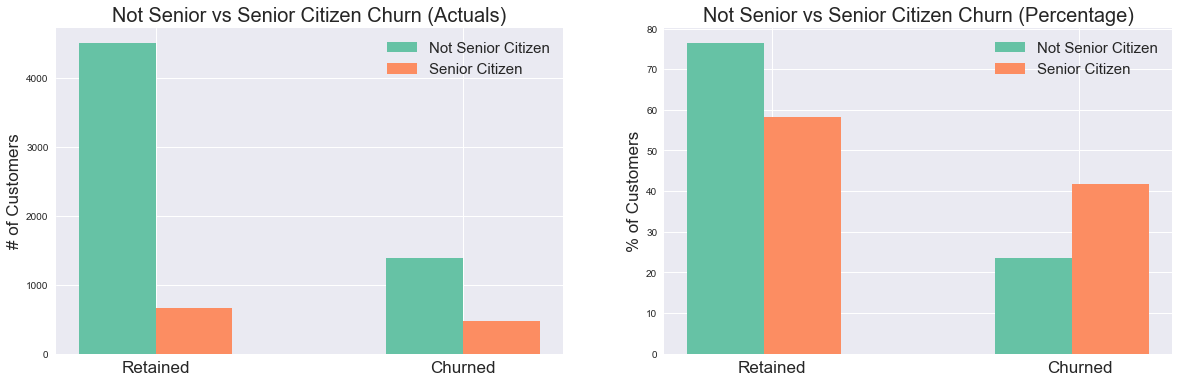

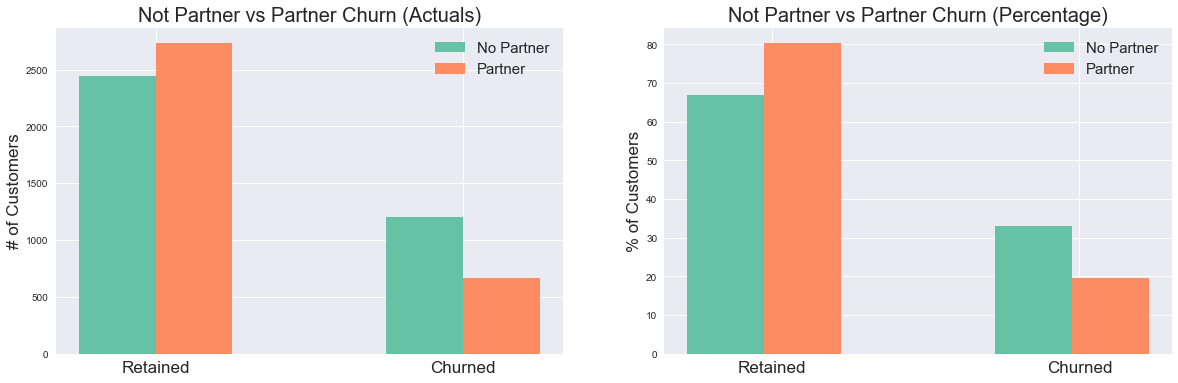

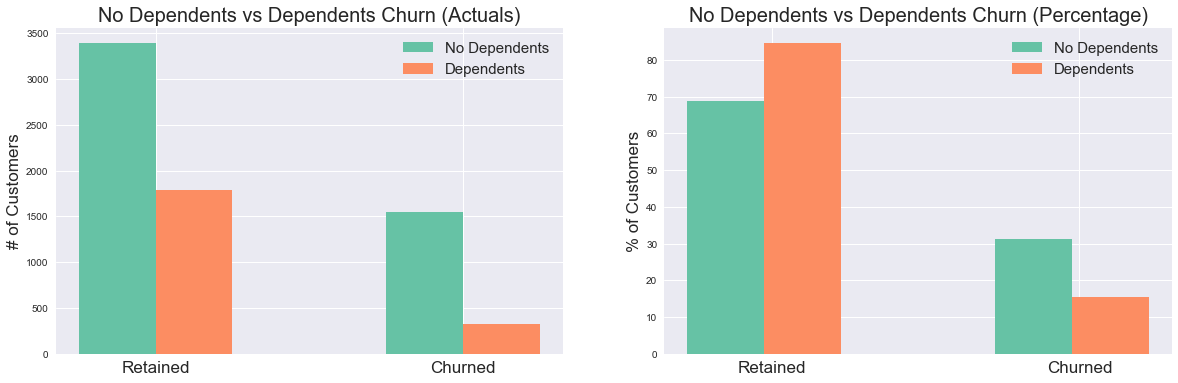

In [1]:
# Load clean and data-wrangled dataset from previous notebook
%run '/Users/sergiogutierrez/Springboard_projects/Capstone 1/Data Story Telco Data Science Capstone Project.ipynb'

# Load Toggle to Reveal/Hide Input Code

In [2]:
# Load visualization libraries
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
sns.set_palette('Set2')

# Which contract types were more likely to retain and churn customers?
Based on the stacked bar chart results below, customers on month-to-month contracts were the most likely to cancel their service(s) with Telco (88.6% of churned customers), as month-to-month customers were not obligated to stay with the provider for a period of time (unlike like one- and two-year contracts) and thus could leave at any point in time.

As it pertains to its retained customers, customers on month-to-month contracts comprise over 40% of Telco's customer base, which was the highest amongst retained contracts and higher than preferred. Surprisingly, customers on two-year contracts were more likely to be retained than those on one-year contracts.

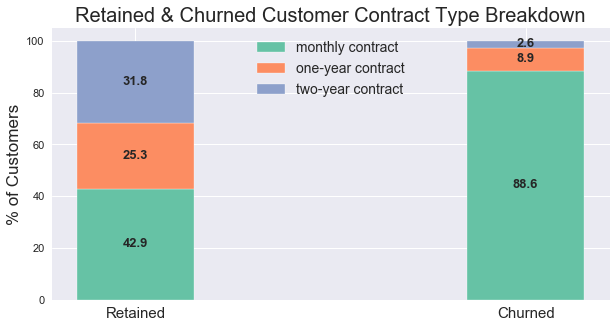

In [3]:
monthly_contract = df.loc[(df.Contract_One_year==0) & (df.Contract_Two_year==0)]
one_year_contract = df.loc[df.Contract_One_year==1]
two_year_contract = df.loc[df.Contract_Two_year==1] 

monthly_churn = list(monthly_contract['Churn_Yes'].value_counts())
one_year_churn = list(one_year_contract['Churn_Yes'].value_counts())
two_year_churn = list(two_year_contract['Churn_Yes'].value_counts())

plt.figure(figsize=(10,5))

r = [0, 1]
names = ['Retained', 'Churned']
contract_data = {'greenBars': monthly_churn, 'orangeBars': one_year_churn,'blueBars': two_year_churn}
contract_df = pd.DataFrame(contract_data)

totals = [i+j+k for i,j,k in zip(contract_df['greenBars'], contract_df['orangeBars'], contract_df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(contract_df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(contract_df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(contract_df['blueBars'], totals)]

barWidth = 0.30
plt.bar(r, greenBars, edgecolor='white', width=barWidth, label = 'monthly contract')
plt.bar(r, orangeBars, bottom=greenBars, edgecolor='white', width=barWidth, label = 'one-year contract')
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], edgecolor='white', width=barWidth, label = 'two-year contract')

for xpos, ypos, yval in zip(r, np.array(greenBars)/2, np.array(greenBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)/2, np.array(orangeBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)+np.array(blueBars)/2, np.array(blueBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)

plt.title("Retained & Churned Customer Contract Type Breakdown", size=20)
plt.xticks(r, names, size=15)
plt.ylabel('% of Customers', size=17)
plt.yticks(np.arange(0, 120, 20), size=11)
plt.legend(fontsize=14, loc='upper center')

plt.show()

# Was there a particular payment method that retained customers preferred or utilized more that may have contributed to their continued service with Telco?  Did it differ from churned customers?
Telco's retained customers were roughly split evenly among the four different payment methods options (close to exactly 25% each, as shown below).  

However, its churned customers were more likely to pay for their services via electronic checks, which was one of the two non-automatic payment options that may have constantly reminded them of the monthly charges and thus weigh the option to cancel or discontinue their contract.

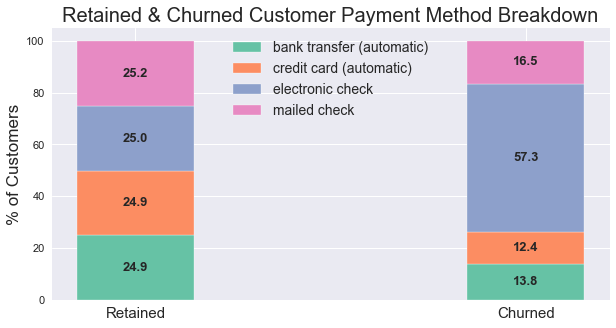

In [4]:
bank_transfer_automatic = df.loc[(df['PaymentMethod_Credit_card_(automatic)']==0) 
                                 & (df.PaymentMethod_Electronic_check==0) 
                                 & (df.PaymentMethod_Mailed_check==0)]
credit_card_automatic = df.loc[(df['PaymentMethod_Credit_card_(automatic)']==1)]
electronic_check = df.loc[df.PaymentMethod_Electronic_check==1]
mailed_check = df.loc[df.PaymentMethod_Mailed_check==1] 

bank_transfer_churn = list(bank_transfer_automatic['Churn_Yes'].value_counts())
credit_card_churn = list(credit_card_automatic['Churn_Yes'].value_counts())
electronic_check_churn = list(electronic_check['Churn_Yes'].value_counts())
mailed_check_churn = list(mailed_check['Churn_Yes'].value_counts())

plt.figure(figsize=(10,5))

r = [0, 1]
names = ['Retained', 'Churned']
payment_data = {'greenBars': bank_transfer_churn, 'orangeBars': credit_card_churn,
                 'blueBars': electronic_check_churn, 'pinkBars': mailed_check_churn}
payment_df = pd.DataFrame(payment_data)

totals = [i+j+k+l for i,j,k,l in zip(payment_df['greenBars'], payment_df['orangeBars'], 
                                     payment_df['blueBars'], payment_df['pinkBars'])]
greenBars = [i / j * 100 for i,j in zip(payment_df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(payment_df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(payment_df['blueBars'], totals)]
pinkBars = [i / j * 100 for i,j in zip(payment_df['pinkBars'], totals)]

barWidth = 0.30
plt.bar(r, greenBars, edgecolor='white', width=barWidth, label = 'bank transfer (automatic)')
plt.bar(r, orangeBars, bottom=greenBars, edgecolor='white', width=barWidth, label = 'credit card (automatic)')
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], edgecolor='white', width=barWidth, label = 'electronic check')
plt.bar(r, pinkBars, bottom=[i+j+k for i,j,k in zip(greenBars, orangeBars, blueBars)], edgecolor='white', width=barWidth, label = 'mailed check')

for xpos, ypos, yval in zip(r, np.array(greenBars)/2, np.array(greenBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)/2, np.array(orangeBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)+np.array(blueBars)/2, np.array(blueBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)+np.array(blueBars)+np.array(pinkBars)/2, np.array(pinkBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)

plt.title("Retained & Churned Customer Payment Method Breakdown", size=20)
plt.xticks(r, names, size=15)
plt.ylabel('% of Customers', size=17)
plt.yticks(np.arange(0, 120, 20), size=11)
plt.legend(fontsize=14, loc='upper center')

plt.show()

# Among the three main service options (i.e., phone, Internet or both), which service option was most popular among retained and churned customers?
Over 60% of retained customers purhcased both phone and Internet services, and over 25% of retained customers purchased phone service exclusively.  As for churned customers, an overwhelming 85% of them purhcased both phone and Internet services in tandem.

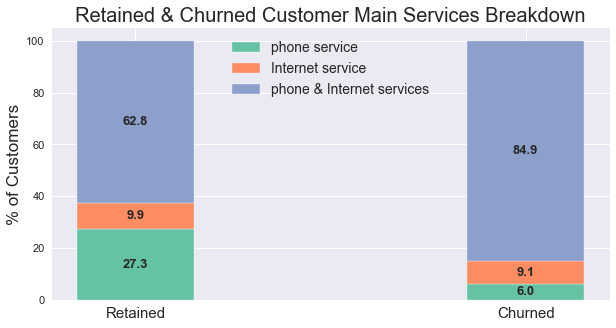

In [5]:
phone_service_only = df.loc[(df.PhoneService_Yes==1) & (df.InternetService_No==1)]
internet_service_only = df.loc[(df.PhoneService_Yes==0) & (df.InternetService_No==0)]
phone_and_internet_service = df.loc[(df.PhoneService_Yes==1) & (df.InternetService_No==0)]

phone_service_churn = list(phone_service_only['Churn_Yes'].value_counts())
internet_service_churn = list(internet_service_only['Churn_Yes'].value_counts())
phone_and_internet_churn = list(phone_and_internet_service['Churn_Yes'].value_counts())

plt.figure(figsize=(10,5))

r = [0, 1]
names = ['Retained', 'Churned']
service_data = {'greenBars': phone_service_churn, 'orangeBars': internet_service_churn,'blueBars': phone_and_internet_churn}
service_df = pd.DataFrame(service_data)

totals = [i+j+k for i,j,k in zip(service_df['greenBars'], service_df['orangeBars'], service_df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(service_df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(service_df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(service_df['blueBars'], totals)]

barWidth = 0.30
plt.bar(r, greenBars, edgecolor='white', width=barWidth, label = 'phone service')
plt.bar(r, orangeBars, bottom=greenBars, edgecolor='white', width=barWidth, label = 'Internet service')
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], edgecolor='white', width=barWidth, label = 'phone & Internet services')

for xpos, ypos, yval in zip(r, np.array(greenBars)/2, np.array(greenBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)/2, np.array(orangeBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)+np.array(blueBars)/2, np.array(blueBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)

plt.title("Retained & Churned Customer Main Services Breakdown", size=20)
plt.xticks(r, names, size=15)
plt.ylabel('% of Customers', size=17)
plt.yticks(np.arange(0, 120, 20), size=11)
plt.legend(fontsize=14, loc='upper center')

plt.show()

# For customers whose contract included phone service, was the multiple phone line add-on more popular for retained or churned customers?
Comparing the multiple phone line percentages between retained and churned customers, it appears that this add-on was equally popular between the two groups and thus it was likely not a major contributor to retaining or churning Telco's customers. 

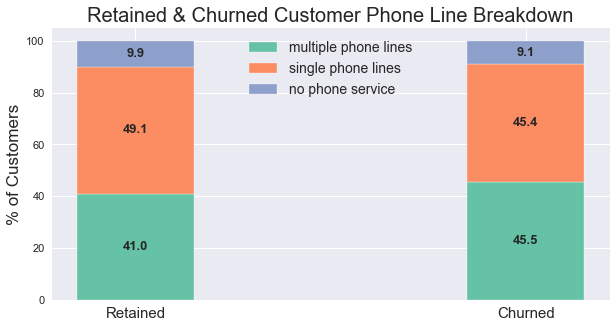

In [6]:
multiple_phone_lines = df.loc[df.MultipleLines_Yes==1]
single_phone_line = df.loc[(df.MultipleLines_Yes==0) & (df.MultipleLines_No_phone_service==0)]
no_phone_service = df.loc[df.MultipleLines_No_phone_service==1] 

multiple_phone_churn = list(multiple_phone_lines['Churn_Yes'].value_counts())
single_phone_churn = list(single_phone_line['Churn_Yes'].value_counts())
no_phone_churn = list(no_phone_service['Churn_Yes'].value_counts())

plt.figure(figsize=(10,5))

r = [0, 1]
names = ['Retained', 'Churned']
phone_data = {'greenBars': multiple_phone_churn, 'orangeBars': single_phone_churn,'blueBars': no_phone_churn}
phone_df = pd.DataFrame(phone_data)

totals = [i+j+k for i,j,k in zip(phone_df['greenBars'], phone_df['orangeBars'], phone_df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(phone_df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(phone_df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(phone_df['blueBars'], totals)]

barWidth = 0.30
plt.bar(r, greenBars, edgecolor='white', width=barWidth, label = 'multiple phone lines')
plt.bar(r, orangeBars, bottom=greenBars, edgecolor='white', width=barWidth, label = 'single phone lines')
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], edgecolor='white', width=barWidth, label = 'no phone service')

for xpos, ypos, yval in zip(r, np.array(greenBars)/2, np.array(greenBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)/2, np.array(orangeBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)+np.array(blueBars)/2, np.array(blueBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)

plt.title("Retained & Churned Customer Phone Line Breakdown", size=20)
plt.xticks(r, names, size=15)
plt.ylabel('% of Customers', size=17)
plt.yticks(np.arange(0, 120, 20), size=11)
plt.legend(fontsize=14, loc='upper center')

plt.show()

# For customers whose contract included Internet service, which Internet type was preferred between retained and churned customers?
While retained customers were roughly equally split between fiber optic and DSL Internet, close to 70% of churned customers purchased fiber optic Internet.

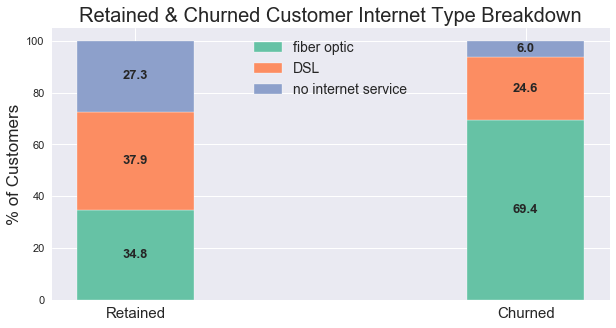

In [7]:
fiber_optic = df.loc[df.InternetService_Fiber_optic==1]
dsl = df.loc[(df.InternetService_Fiber_optic==0) & (df.InternetService_No==0)]
no_internet_service = df.loc[df.InternetService_No==1] 

fiber_optic_churn = list(fiber_optic['Churn_Yes'].value_counts())
dsl_churn = list(dsl['Churn_Yes'].value_counts())
no_internet_churn = list(no_internet_service['Churn_Yes'].value_counts())

plt.figure(figsize=(10,5))

r = [0, 1]
names = ['Retained', 'Churned']
internet_data = {'greenBars': fiber_optic_churn, 'orangeBars': dsl_churn,'blueBars': no_internet_churn}
internet_df = pd.DataFrame(internet_data)

totals = [i+j+k for i,j,k in zip(internet_df['greenBars'], internet_df['orangeBars'], internet_df['blueBars'])]
greenBars = [i / j * 100 for i,j in zip(internet_df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(internet_df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(internet_df['blueBars'], totals)]

barWidth = 0.30
plt.bar(r, greenBars, edgecolor='white', width=barWidth, label = 'fiber optic')
plt.bar(r, orangeBars, bottom=greenBars, edgecolor='white', width=barWidth, label = 'DSL')
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], edgecolor='white', width=barWidth, label = 'no internet service')

for xpos, ypos, yval in zip(r, np.array(greenBars)/2, np.array(greenBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)/2, np.array(orangeBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)+np.array(blueBars)/2, np.array(blueBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)

plt.title("Retained & Churned Customer Internet Type Breakdown", size=20)
plt.xticks(r, names, size=15)
plt.ylabel('% of Customers', size=17)
plt.yticks(np.arange(0, 120, 20), size=11)
plt.legend(fontsize=14, loc='upper center')

plt.show()

# For customers whose contract included Internet service, what streaming options were popular for retained and churned customers?
While retained customers were equally likely to not purchase either streaming add-on or purchase both TV & Movie streaming, churned customers were more likely to not purchase either streaming add-on but those who did were more likely to purchase streaming TV and Movies in tandem.

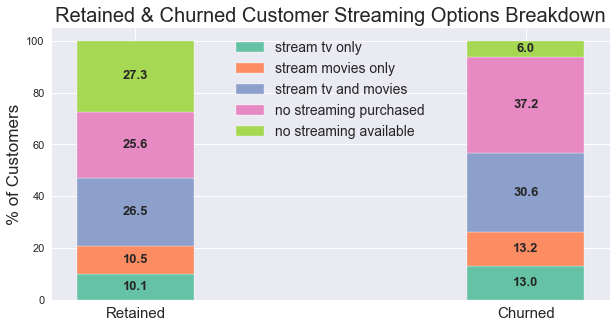

In [8]:
streaming_tv_only = df.loc[(df.StreamingTV_Yes==1) & (df.StreamingMovies_Yes==0)]
streaming_movies_only = df.loc[(df.StreamingTV_Yes==0) & (df.StreamingMovies_Yes==1)]
streaming_tv_and_movies = df.loc[(df.StreamingTV_Yes==1) & (df.StreamingMovies_Yes==1)]
no_streaming_purchased = df.loc[(df.StreamingTV_Yes==0) & (df.StreamingMovies_Yes==0) & (df.StreamingTV_No_internet_service==0)]
no_streaming_available = df.loc[(df.StreamingTV_No_internet_service==1)] 

streaming_tv_churn = list(streaming_tv_only['Churn_Yes'].value_counts())
streaming_movies_churn = list(streaming_movies_only['Churn_Yes'].value_counts())
streaming_tv_and_movies_churn = list(streaming_tv_and_movies['Churn_Yes'].value_counts())
no_streaming_purchased_churn = list(no_streaming_purchased['Churn_Yes'].value_counts())
no_streaming_available_churn = list(no_streaming_available['Churn_Yes'].value_counts())

plt.figure(figsize=(10,5))

r = [0, 1]
names = ['Retained', 'Churned']
streaming_data = {'greenBars': streaming_tv_churn, 'orangeBars': streaming_movies_churn,
                'blueBars': streaming_tv_and_movies_churn, 'pinkBars': no_streaming_purchased_churn, 
                'greenerBars': no_streaming_available_churn}
streaming_df = pd.DataFrame(streaming_data)

totals = [i+j+k+l+m for i,j,k,l,m in zip(streaming_df['greenBars'], streaming_df['orangeBars'], 
                                     streaming_df['blueBars'], streaming_df['pinkBars'],
                                     streaming_df['greenerBars'])]
greenBars = [i / j * 100 for i,j in zip(streaming_df['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(streaming_df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(streaming_df['blueBars'], totals)]
pinkBars = [i / j * 100 for i,j in zip(streaming_df['pinkBars'], totals)]
greenerBars = [i / j * 100 for i,j in zip(streaming_df['greenerBars'], totals)]

barWidth = 0.30
plt.bar(r, greenBars, edgecolor='white', width=barWidth, label = 'stream tv only')
plt.bar(r, orangeBars, bottom=greenBars, edgecolor='white', width=barWidth, label = 'stream movies only')
plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], edgecolor='white', width=barWidth, label = 'stream tv and movies')
plt.bar(r, pinkBars, bottom=[i+j+k for i,j,k in zip(greenBars, orangeBars, blueBars)], edgecolor='white', width=barWidth, label = 'no streaming purchased')
plt.bar(r, greenerBars, bottom=[i+j+k+l for i,j,k,l in zip(greenBars, orangeBars, blueBars, pinkBars)], edgecolor='white', width=barWidth, label = 'no streaming available')

for xpos, ypos, yval in zip(r, np.array(greenBars)/2, np.array(greenBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)/2, np.array(orangeBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)+np.array(blueBars)/2, np.array(blueBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)+np.array(blueBars)+np.array(pinkBars)/2, np.array(pinkBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)
for xpos, ypos, yval in zip(r, np.array(greenBars)+np.array(orangeBars)+np.array(blueBars)+np.array(pinkBars)+np.array(greenerBars)/2, np.array(greenerBars)):
    plt.text(xpos, ypos, "%.1f"%yval, ha="center", va="center", weight='bold', fontsize=13)

plt.title("Retained & Churned Customer Streaming Options Breakdown", size=20)
plt.xticks(r, names, size=15)
plt.ylabel('% of Customers', size=17)
plt.yticks(np.arange(0, 120, 20), size=11)
plt.legend(fontsize=14, loc='upper center')

plt.show()

# Are there any correlations between or among any of the variables, especially for those related to customer retention and attrition?
Based on the heatmap results below, there appears to be the strongest (or most positive) relationship among tenure, monthly charges and total charges.  This means that customers with higher monthly and total charges were more likely to have a longer tenure and thus likelier to be retained as customers.

Another strong correlation worth noting is monthly charges and the combination of phone, Internet and add-on services (e.g., streaming TV and movies), which simply means the more services and add-ons purchased the higher monthly charges customers pay.

Lastly, the other standout correlation is the contract types (monthly, one year and two year) and tenure (months with the provider).  It appears the higher number of months customers are contracted with the provider leads to longer time customers stay with the provider.

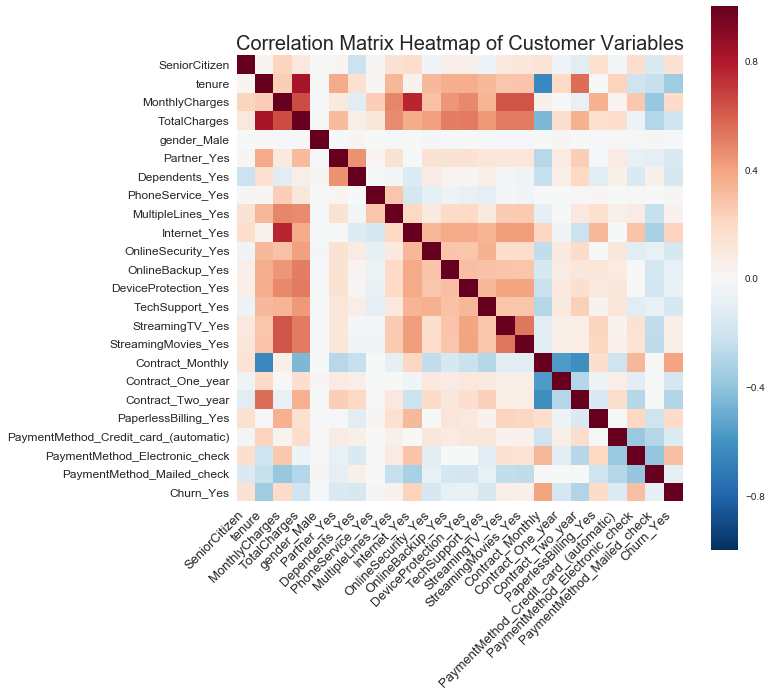

In [9]:
plt.figure(figsize=(10, 10))

df['Internet_Yes'] = np.where((df.InternetService_Fiber_optic==1)|(df.InternetService_Fiber_optic==0) & (df.InternetService_No==0), 1, 0)
df['Contract_Monthly'] = np.where((df.Contract_One_year==0) & (df.Contract_Two_year==0), 1, 0)
df = df.reindex(columns=['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges',
       'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No_phone_service',
       'MultipleLines_Yes', 'Internet_Yes', 'InternetService_Fiber_optic',
       'InternetService_No', 'OnlineSecurity_No_internet_service',
       'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service',
       'OnlineBackup_Yes', 'DeviceProtection_No_internet_service',
       'DeviceProtection_Yes', 'TechSupport_No_internet_service',
       'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes',
       'StreamingMovies_No_internet_service', 'StreamingMovies_Yes',
       'Contract_Monthly', 'Contract_One_year', 'Contract_Two_year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit_card_(automatic)',
       'PaymentMethod_Electronic_check', 'PaymentMethod_Mailed_check',
       'Churn_Yes'])
heatmap_df = df[df.columns.drop(list(df.filter(regex='No'))) & df.columns.drop('InternetService_Fiber_optic')]


ax = sns.heatmap(heatmap_df.corr(), vmin=-1, vmax=1, center=0, square=True)
ax.set_yticklabels(ax.get_yticklabels(), size=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', size=13)
plt.title("Correlation Matrix Heatmap of Customer Variables", size=20);

# Exploring the Relationship Between Total and Month Charges by Tenure
As depicted below, customers tend to have longer tenures when have higher monthly charges or pay for more services and/or add-ons.  This means customers that treated Telco as a one-stop shop telecom provider and/or rely on most or all of their services were most likely to continue their contracts & stay with Telco.

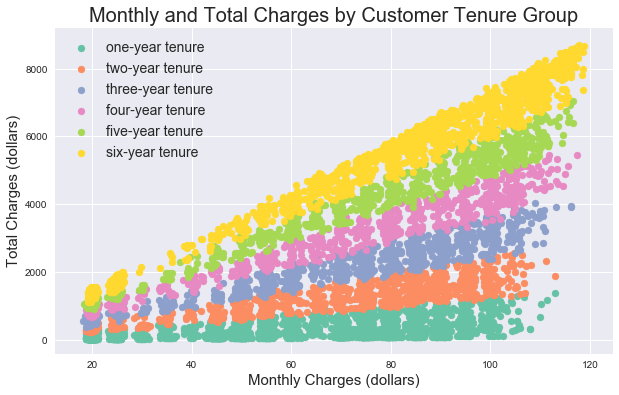

In [10]:
ten_one_year = df.loc[df.tenure.between(0, 12)]
ten_two_year = df.loc[df.tenure.between(13, 24)]
ten_three_year = df.loc[df.tenure.between(25, 36)]
ten_four_year = df.loc[df.tenure.between(37, 48)]
ten_five_year = df.loc[df.tenure.between(49, 60)]
ten_six_year = df.loc[df.tenure.between(61, 72)]

plt.figure(figsize=(10,6))
plt.scatter(y=ten_one_year['TotalCharges'], x=ten_one_year['MonthlyCharges'], label='one-year tenure')
plt.scatter(y=ten_two_year['TotalCharges'], x=ten_two_year['MonthlyCharges'], label='two-year tenure')
plt.scatter(y=ten_three_year['TotalCharges'], x=ten_three_year['MonthlyCharges'], label='three-year tenure')
plt.scatter(y=ten_four_year['TotalCharges'], x=ten_four_year['MonthlyCharges'], label='four-year tenure')
plt.scatter(y=ten_five_year['TotalCharges'], x=ten_five_year['MonthlyCharges'], label='five-year tenure')
plt.scatter(y=ten_six_year['TotalCharges'], x=ten_six_year['MonthlyCharges'], label='six-year tenure')

plt.title("", size=20)
plt.xlabel('Monthly Charges (dollars)', size=15)
plt.ylabel('Total Charges (dollars)', size=15)
plt.title("Monthly and Total Charges by Customer Tenure Group", size=20)
plt.legend(fontsize=14)

plt.show()

# Exploring the Phone and Internet Add-ons by Retained & Churned Customers
As has been the trend, retained customers were more likely to purchase the add-ons (compared to churned customers) and in a well-rounded manner as illustrated below.  As for churned customers, the only add-on services they purhcase more compared to the others were streaming TV & Movies and multiple phone lines.

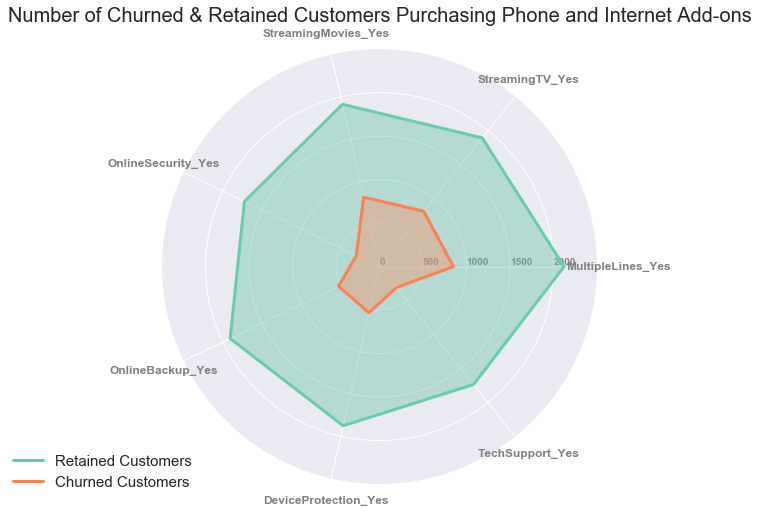

In [11]:
from math import pi

package_df = pd.DataFrame({
'group': ['Retained','Churned'],
'MultipleLines_Yes': multiple_phone_churn,
'StreamingTV_Yes': df.loc[df.StreamingTV_Yes==1, 'Churn_Yes'].value_counts(),
'StreamingMovies_Yes': df.loc[df.StreamingMovies_Yes==1, 'Churn_Yes'].value_counts(),
'OnlineSecurity_Yes': df.loc[df.OnlineSecurity_Yes==1, 'Churn_Yes'].value_counts(),
'OnlineBackup_Yes': df.loc[df.OnlineBackup_Yes==1, 'Churn_Yes'].value_counts(),
'DeviceProtection_Yes': df.loc[df.DeviceProtection_Yes==1, 'Churn_Yes'].value_counts(),
'TechSupport_Yes': df.loc[df.TechSupport_Yes==1, 'Churn_Yes'].value_counts()
}, columns=['group', 'MultipleLines_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 
            'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes'])
 
plt.figure(figsize=(10, 8)) 

categories=list(package_df)[1:]
N = len(categories)

values=package_df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 

ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='grey', size=12, weight='bold')
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(np.arange(0, 2400, 500), color="grey", weight='bold')
plt.ylim(0,2500)
 
# Plot data
ax.plot(angles, values, linewidth=3, linestyle='solid', color='mediumaquamarine', label='Retained Customers')

# Fill area
ax.fill(angles, values, alpha=0.4)

values=package_df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=3, color='coral', linestyle='solid', label='Churned Customers')
ax.fill(angles, values, alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=15)
plt.title("Number of Churned & Retained Customers Purchasing Phone and Internet Add-ons", size=20);

# Validating the Positive Relationships between Customer Charges & Tenure
Lastly, in an effort to quantify and validate the degree to which these variables are closely related, the below charts measure the correlation between total charges and tenure (with a pearson coefficient of 0.83), and between total charges and monthly charges (with a pearson coefficient of 0.65).  

This exploratoy data review concludes that customers that spend more are more likely to be retained and those that spend less are likely to churn.  

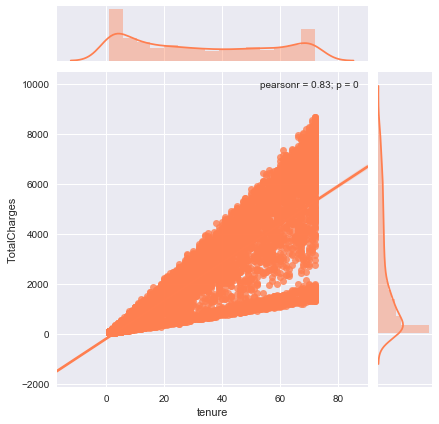

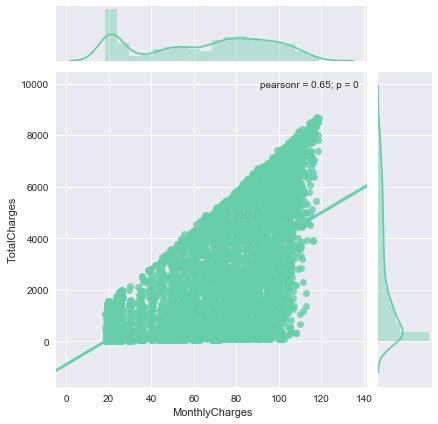

In [12]:
sns.jointplot(x='tenure', y='TotalCharges', data=df, kind='reg', color='coral')

sns.jointplot(x='MonthlyCharges', y='TotalCharges', data=df, kind='reg',  color='mediumaquamarine')

plt.show()

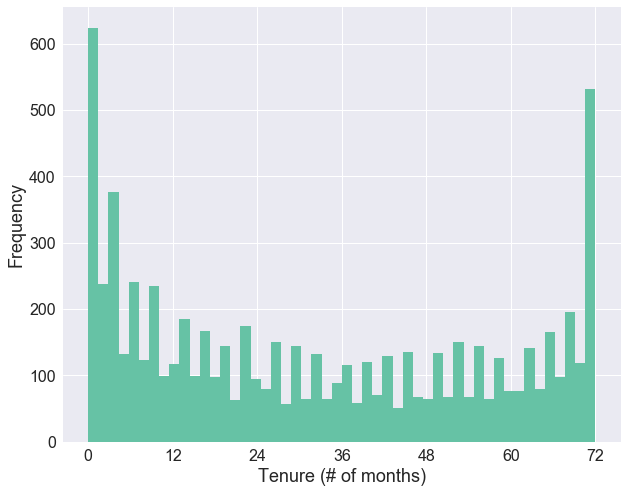

In [46]:
plt.figure(figsize=(10, 8)) 
plt.hist(df.tenure, bins=50)
plt.xticks(np.arange(0, 84, 12), size=16)
plt.yticks(size=16)
plt.xlabel('Tenure (# of months)', size=18)
plt.ylabel('Frequency', size=18)

plt.show()

In [50]:
print('𝐻₀: μ <= 12')
print('𝐻ₐ: μ ≠ 12')

𝐻₀: μ = 12
𝐻ₐ: μ ≠ 12


In [58]:
from scipy import stats
from scipy.stats import t

len_tenure = len(df.tenure)
mean, std = np.mean(df.tenure), np.std(df.tenure)
t_stat = (mean - 32) / (std / np.sqrt(len_tenure))
   v vujt_pval = stats.t.sf(np.abs(t_stat), len_tenure-1)

print('The t-statistic is '+ str(t_stat))
print('The p-value is '+ str(t_pval))

The t-statistic is 1.2683478807
The p-value is 0.102357836686


In [56]:
from scipy.stats import t

t_bounds = t.interval(0.95, len_tenure-1)
confid_int = [mean + ((crit_val * std) / np.sqrt(len_tenure)) for crit_val in t_bounds]
confid_int

[31.797518137914086, 32.944779178570371]